In [3]:
import pandas as pd
from datetime import datetime
from scipy.stats import percentileofscore
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import math
from functools import reduce
from typing import Sequence
from collections import Counter

In [4]:
#Rename the file to be correct and make sure the correct instance is used.
instance = 0
folder = 'C:\\Users\\i.bermejo\\Documents\\Data\\CARRIER\\UKBB\\'
file = folder + 'data_participant.csv'
file2 = folder + "data_death_cause.csv" #the causes of death are in a different dataset.
percentiles = pd.read_csv("deprivation percentiles.csv")
dataset = pd.read_csv(file)
death_data = pd.read_csv(file2)
death_data = death_data.groupby("eid").agg("|".join) #collapse the causes of death data to have the same length as the dataset
data = pd.merge(dataset.reset_index(), death_data.reset_index(), on = "eid", how = "left") #combine the datasets.

C:\Users\i.bermejo\AppData\Local\Temp\ipykernel_25976\981591657.py:7: DtypeWarning: Columns (114) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(file)


In [5]:
death_data.head()

,dnx_death_cause_id,cause_icd10
eid,,
1000210,1000210-0-0,C56
1001624,1001624-0-2|1001624-0-1|1001624-0-0|1001624-0-3,J849|J189|U071|M069
1004324,1004324-0-2|1004324-0-1|1004324-0-0,C61|C80|C679
1006549,1006549-0-2|1006549-0-0|1006549-0-1,A419|K509|K631
1008144,1008144-0-1|1008144-0-0,I312|I710


In [6]:
death_data['cause_icd10'].unique)

array(['C56', 'J849|J189|U071|M069', 'C61|C80|C679', ...,
       'K562|G318|J189|R688', 'J690|I48|J81|C349', 'X708|R55|T71'],
      dtype=object)

In [82]:
dataset.shape

(36866, 117)

In [83]:
dataset.head()

,eid,31-0.0,20116-0.0,6177-0.0,6153-0.0,4080-0.0,4080-0.1,26410-0.0,26427-0.0,26426-0.0,...,26093-0.0,26144-0.0,26083-0.0,26134-0.0,26150-0.0,2443-0.0,131374-0.0,131376-0.0,131388-0.0,40000-0.0
0,1000771,0,0,NaN,-7,115.0,110.0,12.97,NaN,NaN,...,210.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN
1,1001066,0,0,NaN,-7,109.0,107.0,8.61,NaN,NaN,...,205.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN
2,1002412,0,0,NaN,-7,104.0,114.0,31.03,NaN,NaN,...,200.0,0.0,0.0,120.0,0.0,0,NaN,NaN,NaN,NaN
3,1002445,0,0,NaN,-7,176.0,154.0,5.47,NaN,NaN,...,305.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN
4,1003161,0,1,NaN,-7,151.0,126.0,30.36,NaN,NaN,...,100.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN


In [84]:
# Sex
dataset['31-0.0'].value_counts()

0    20211
1    16655
Name: 31-0.0, dtype: int64

In [85]:
# Smoking status: 0 - Never, 1 - Previous, 2 - Current
dataset['20116-0.0'].value_counts() 

0    21022
1    12803
2     3041
Name: 20116-0.0, dtype: int64

In [86]:
# Medication for cholesterol, blood pressure or diabetes
dataset['6177-0.0'].value_counts()

-7       11207
1|2       2300
2         1565
1         1391
1|2|3      108
1|3         51
3           25
2|3          8
Name: 6177-0.0, dtype: int64

In [87]:
# Medication for cholesterol, blood pressure, diabetes, or take exogenous hormones
dataset['6153-0.0'].value_counts()

-7         14244
2           1740
1|2         1150
4           1096
1            961
5            504
2|4          153
1|2|4         77
1|4           76
1|2|3         70
1|3           39
3             21
4|5           21
2|5           17
2|3            7
1|5            7
1|2|3|4        6
1|4|5          5
1|2|5          5
1|3|4          3
3|5            2
1|3|5          1
1|2|3|5        1
2|4|5          1
1|2|4|5        1
2|3|5          1
3|4            1
Name: 6153-0.0, dtype: int64

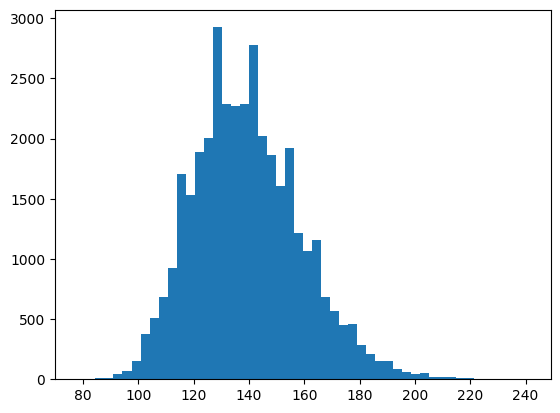

In [88]:
#Systolic blood pressure, automated reading
plt.hist(dataset['4080-0.0'], bins = 50)
plt.show() 

In [89]:
dataset['26426-0.0']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
36861   NaN
36862   NaN
36863   NaN
36864   NaN
36865   NaN
Name: 26426-0.0, Length: 36866, dtype: float64

C:\Python310\lib\site-packages\matplotlib\axes\_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Python310\lib\site-packages\matplotlib\axes\_axes.py:6764: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

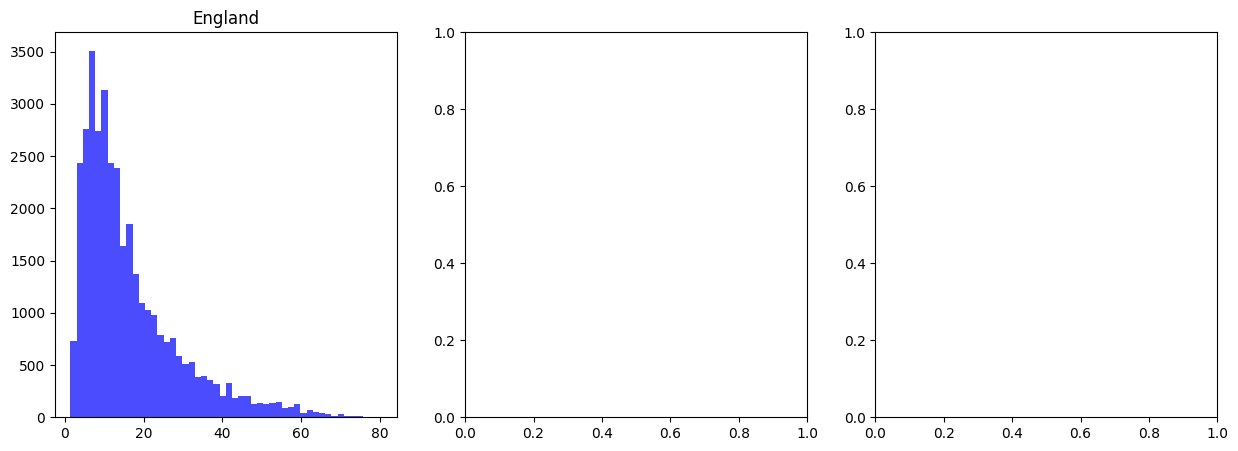

In [90]:
# Index of Multiple Deprivation
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Step 3: Plot each histogram in its respective subplot
axes[0].hist(dataset['26410-0.0'], bins = 50, color='blue', alpha=0.7)
axes[0].set_title('England')

axes[1].hist(dataset['26427-0.0'], bins=50, color='green', alpha=0.7)
axes[1].set_title('Scotland')

axes[2].hist(dataset['26426-0.0'], bins=30, color='red', alpha=0.7)
axes[2].set_title('Wales')

# Step 4: Adjust layout to prevent overlap
plt.tight_layout()

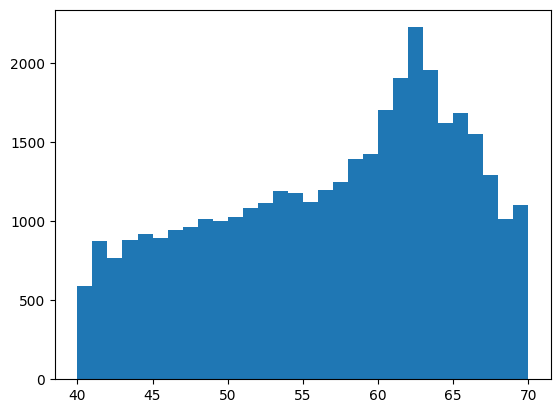

In [91]:
# Age when attended assessment centre
plt.hist(dataset['21003-0.0'], bins = 30)
plt.show() 

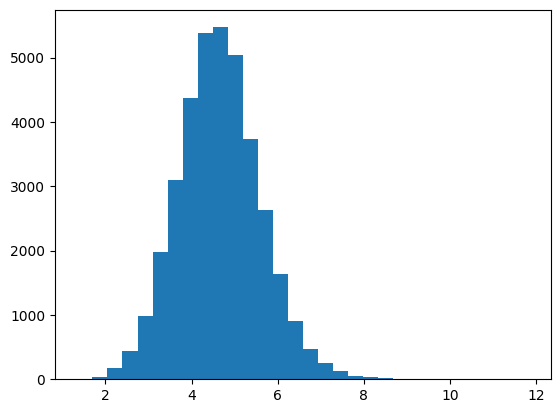

In [92]:
# Total cholesterol
plt.hist(dataset['23400-0.0'], bins = 30)
plt.show()

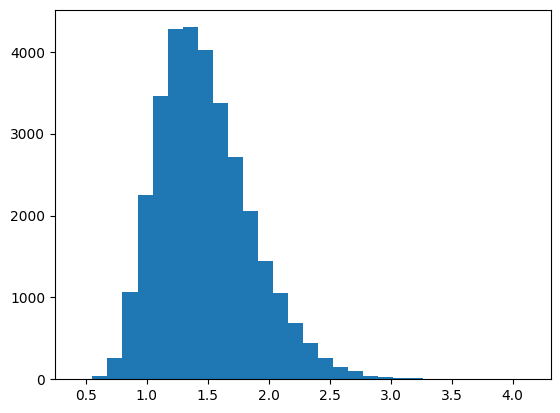

In [93]:
# HDL cholesterol
plt.hist(dataset['30760-0.0'], bins = 30)
plt.show()

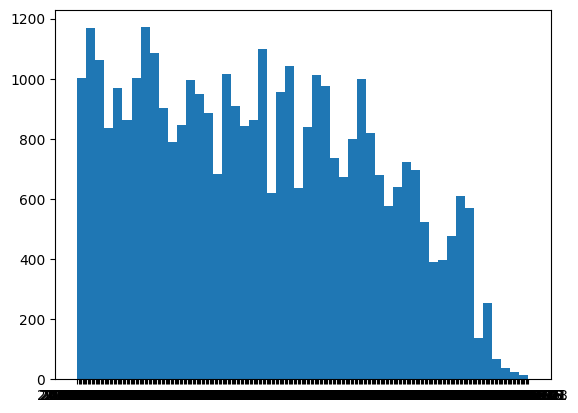

2009-05-06


0

In [7]:
# Date attending asessment centre
plt.hist(dataset['53-0.0'], bins = 50)
plt.show()
print(min(dataset['53-0.0']))
dataset['53-0.0'].isna().sum()

In [95]:
# Date lost to follow up
dataset['191-0.0'].value_counts()

2014-06-03    25
2014-07-21     3
2014-11-18     3
2010-12-20     2
2013-03-20     2
2011-08-08     2
2014-06-06     2
2011-05-20     2
2010-07-07     2
2011-04-08     1
2011-10-13     1
2013-07-30     1
2012-10-11     1
2011-02-25     1
2013-07-11     1
2012-01-11     1
2009-10-08     1
2014-06-18     1
2013-03-21     1
2014-05-27     1
2011-11-25     1
2014-05-02     1
2013-06-19     1
2013-10-21     1
2012-02-02     1
2014-11-24     1
2014-06-04     1
2013-10-04     1
2014-06-10     1
2014-08-06     1
2014-07-02     1
2010-06-15     1
2013-12-09     1
2012-09-18     1
2013-10-09     1
2014-04-03     1
2013-10-08     1
2012-10-12     1
2013-04-22     1
2014-02-19     1
2013-11-27     1
2014-05-03     1
2014-02-11     1
2009-12-16     1
2011-12-13     1
2011-12-14     1
2011-02-21     1
2012-09-03     1
2014-02-20     1
2012-09-04     1
2012-01-10     1
2013-07-29     1
2014-08-11     1
2010-12-24     1
2010-09-23     1
2014-06-30     1
2013-07-24     1
2011-09-05     1
2014-08-22    

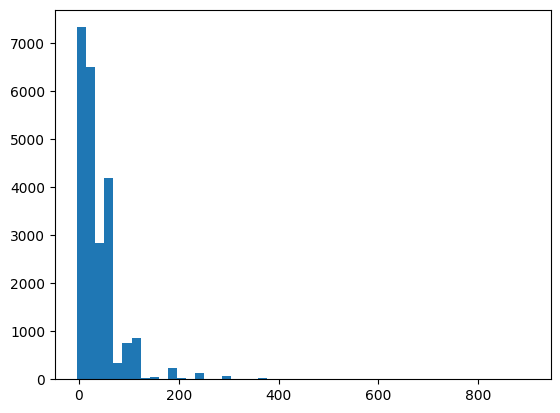

In [96]:
# Duration of vigorous activity minutes/day	 
plt.hist(dataset['914-0.0'], bins = 50)
plt.show()

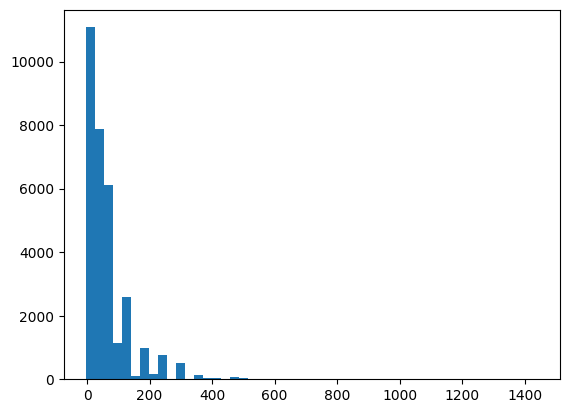

5174

In [97]:
# Duration of moderate activity minutes / day
plt.hist(dataset['894-0.0'], bins = 50)
plt.show()
dataset['894-0.0'].isna().sum()

In [98]:
# Duration of strenuous sports 
print(dataset['1001-0.0'].value_counts())
dataset['1001-0.0'].isna().sum()

 3.0    1614
 4.0    1293
 5.0     522
 2.0     292
 6.0     205
 7.0     152
 1.0      47
-1.0      40
-3.0       8
Name: 1001-0.0, dtype: int64


32693

In [99]:
# Frequency of strenuous sports in last 4 weeks
print(dataset['991-0.0'].value_counts())
print("Missing data: %.2f " % (dataset['991-0.0'].isna().sum()*100/len(dataset)))

 4.0    1593
 3.0     947
 5.0     663
 2.0     603
 1.0     220
 6.0      93
-1.0      48
-3.0       6
Name: 991-0.0, dtype: int64
Missing data: 88.68 


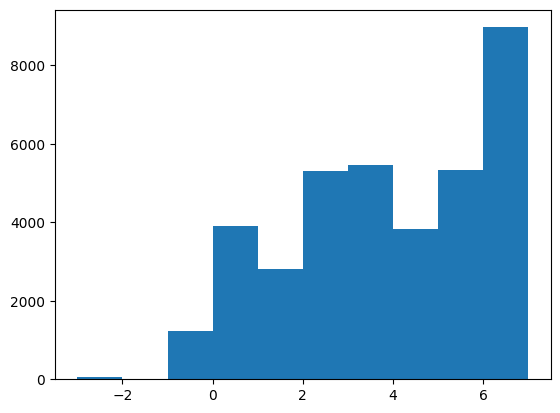

Missing data: 0.00 


In [100]:
# Number of days/week of moderate physical activity 10+ minute
plt.hist(dataset['884-0.0'], bins = 10)
plt.show()
print("Missing data: %.2f " % (dataset['884-0.0'].isna().sum()*100/len(dataset)))

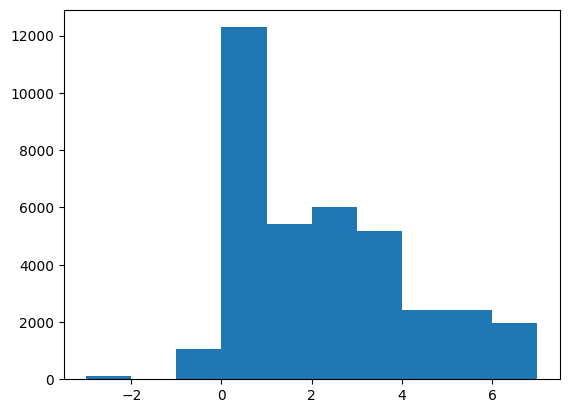

Missing data: 0.00 


In [101]:
# Number of days/week of vigorous physical activity 10+ minute
plt.hist(dataset['904-0.0'], bins = 10)
plt.show()
print("Missing data: %.2f " % (dataset['904-0.0'].isna().sum()*100/len(dataset)))

In [102]:
# Date I10 first reported (essential (primary) hypertension)
print(dataset['131286-0.0'].value_counts())
print("Missing data: %.2f " % (dataset['131286-0.0'].isna().sum()*100/len(dataset)))

2009-07-01    97
2006-07-01    89
2000-07-01    86
2008-07-01    84
2004-07-01    82
              ..
2019-07-09     1
2017-02-20     1
2010-10-17     1
2017-07-11     1
2009-10-27     1
Name: 131286-0.0, Length: 3725, dtype: int64
Missing data: 62.63 


In [103]:
# Date I12 first reported (hypertensive renal disease)
print(dataset['131290-0.0'].value_counts())
print("Missing data: %.2f " % (dataset['131290-0.0'].isna().sum()*100/len(dataset)))

2010-02-02    2
2011-09-01    1
2009-03-05    1
2012-03-26    1
2004-09-23    1
             ..
2008-10-21    1
2010-02-08    1
2006-10-06    1
2011-12-16    1
2010-03-22    1
Name: 131290-0.0, Length: 134, dtype: int64
Missing data: 99.63 


In [104]:
# Date I13 first reported (hypertensive heart and renal disease)
print(dataset['131292-0.0'].value_counts())
print("Missing data: %.2f " % (dataset['131292-0.0'].isna().sum()*100/len(dataset)))

2022-06-29    1
2019-04-09    1
2022-01-11    1
2017-12-02    1
2000-12-29    1
2020-12-09    1
2013-11-12    1
2019-02-21    1
2021-08-11    1
2014-09-04    1
2021-02-03    1
2017-08-13    1
Name: 131292-0.0, dtype: int64
Missing data: 99.97 


In [105]:
# the icd10 codes for cause of death 
Fatal_CVD_ICD10 = ['I10', 'I11', 'I12', 'I13', 'I14', 'I15', 'I16',               # Hypertensive disease
                   'I20', 'I21', 'I22', 'I23', 'I24', 'I25',                      # Ischemic heart disease
                   'I46', 'I47', 'I48', 'I49', 'I50', 'I51', 'I52', 'I60',        # Arrhythmias, heart failure
                   'I61', 'I62', 'I63', 'I64', 'I65', 'I66', 'I67', 'I68', 'I69', # Cerebrovascular disease
                   'I70', 'I71', 'I72', 'I73',                                    # Atherosclerosis/AAA 
                   'R960', 'R961']                                                # Sudden death and death within 24h of symptom onset

Fatal_CVD_ICD10_excl = ['I514', 'I60', 'I62', 'I671', 'I682', 'I675']

#fieldids for later use
predictors_field_ids_non_fatal = ["131298", # Date I21 first reported (acute myocardial infarction)
                                  "131300", # Date I22 first reported (subsequent myocardial infarction)
                                  "131302", # Date I23 first reported (certain current complications following acute myocardial infarction)
                                  "131362", # Date I61 first reported (intracerebral haemorrhage)
                                  "131366", # Date I63 first reported (cerebral infarction)
                                  "131368", # Date I64 first reported (stroke, not specified as haemorrhage or infarction)
                                  "131370", # Date I65 first reported (occlusion and stenosis of precerebral arteries, not resulting in cerebral infarction)
                                  "131372", # Date I66 first reported (occlusion and stenosis of cerebral arteries, not resulting in cerebral infarction)
                                  "131378"] # Date I69 first reported (sequelae of cerebrovascular disease)

predictors_field_ids_fatal = ["131286", # Date I10 first reported (essential (primary) hypertension)
                              "131288", # Date I11 first reported (hypertensive heart disease)
                              "131290", # Date I12 first reported (hypertensive renal disease)
                              "131292", # Date I13 first reported (hypertensive heart and renal disease)
                              "131294", # Date I15 first reported (secondary hypertension)
                              "131296", # Date I20 first reported (angina pectoris)
                              "131304", # Date I24 first reported (other acute ischaemic heart diseases)
                              "131306", # Date I25 first reported (chronic ischaemic heart disease)
                              "131346", # Date I46 first reported (cardiac arrest)
                              "131348", # Date I47 first reported (paroxysmal tachycardia)
                              "131350", # Date I48 first reported (atrial fibrillation and flutter)
                              "131352", # Date I49 first reported (other cardiac arrhythmias)
                              "131354", # Date I50 first reported (heart failure)
                              "131356", # Date I51 first reported (complications and ill-defined descriptions of heart disease)
                              "131358", # Date I52 first reported (other heart disorders in diseases classified elsewhere)
                              "131380", # Date I70 first reported (atherosclerosis)
                              "131382", # Date I71 first reported (aortic aneurysm and dissection)
                              "131384", # Date I72 first reported (other aneurysm)
                              "131386"] # Date I73 first reported (other peripheral vascular diseases)

#fieldids to check for later events
all_cvs_fields = ["131286", # Date I10 first reported (essential (primary) hypertension)
                  "131288", # Date I11 first reported (hypertensive heart disease)
                  "131290", # Date I12 first reported (hypertensive renal disease)
                  "131292", # Date I13 first reported (hypertensive heart and renal disease)
                  "131294", # Date I15 first reported (secondary hypertension)
                  "131296", # Date I20 first reported (angina pectoris)
                  "131304", # Date I24 first reported (other acute ischaemic heart diseases)
                  "131306", # Date I25 first reported (chronic ischaemic heart disease)
                  "131346", # Date I46 first reported (cardiac arrest)
                  "131348", # Date I47 first reported (paroxysmal tachycardia)
                  "131350", # Date I48 first reported (atrial fibrillation and flutter)
                  "131352", # Date I49 first reported (other cardiac arrhythmias)
                  "131354", # Date I50 first reported (heart failure)
                  "131356", # Date I51 first reported (complications and ill-defined descriptions of heart disease)
                  "131358", # Date I52 first reported (other heart disorders in diseases classified elsewhere)
                  "131380", # Date I70 first reported (atherosclerosis)
                  "131382", # Date I71 first reported (aortic aneurysm and dissection)
                  "131384", # Date I72 first reported (other aneurysm)
                  "131386", # Date I73 first reported (other peripheral vascular diseases)
                  "131298", # Date I21 first reported (acute myocardial infarction)
                  "131300", # Date I22 first reported (subsequent myocardial infarction)
                  "131302", # Date I23 first reported (certain current complications following acute myocardial infarction)
                  "131362", # Date I61 first reported (intracerebral haemorrhage)
                  "131366", # Date I63 first reported (cerebral infarction)
                  "131368", # Date I64 first reported (stroke, not specified as haemorrhage or infarction)
                  "131370", # Date I65 first reported (occlusion and stenosis of precerebral arteries, not resulting in cerebral infarction)
                  "131372", # Date I66 first reported (occlusion and stenosis of cerebral arteries, not resulting in cerebral infarction)
                  "131378"] # Date I69 first reported (sequelae of cerebrovascular disease)
all_fields = ["31",    # Sex
              "53",    # Date of attending assessment centre
              "21003", # Age when attended assessment centre
              "4080",  # Systolic blood pressure, automated reading
              "20116", # Smoking status
              "6177",  # Medication for cholesterol, blood pressure or diabetes
              "6153",  # Medication for cholesterol, blood pressure, diabetes, or take exogenous hormones
              "884",   # Number of days/week of moderate physical activity 10+ minutes
              "894",   # Duration of moderate activity (minutes/day)
              "904",   # Number of days/week of vigorous physical activity 10+ minutes
              "914",   # Duration of vigorous activity (minutes / day)
              "26410", # Index of Multiple Deprivation (England)
              "26427", # Index of Multiple Deprivation (Scotland)
              "26426", # Index of Multiple Deprivation (Wales)
              "26030", # Alcohol (g, past 24h)
              "26090", # Berries (past 24h)
              "26091", # Citrus
              "26093", # Other fruit
              "26065", # Allium vegetables
              "26098", # Green leafy/cabbages
              "26146", # Other vegetables, including mushrooms, fruiting and mixed vegetables
              "26115", # Peas and sweetcorn
              "26143", # Tomatoes
              "26144", # Vegetable dips
              "26147", # Vegetable side dishes
              "26123", # Raw salad
              "26125", # Root vegetables
              "26076", # Bran cereal
              "26071", # Mixed bread (50/50), brown and seeded
              "26077", # Oat cereal (non sugar)
              "26078", # Oat cereal (sugar)
              "26074", # Wholemeal bread
              "26114", # Wholemeal pasta, brown rice and other wholegrains
              "26105", # Muesli
              "26113", # White pasta and rice
              "26073", # White bread
              "26068", # Biscuits
              "26075", # Biscuit cereal
              "26101", # Legumes and pulses
              "26107", # Unsalted nuts and seeds
              "26099", # High fat cheese
              "26103", # Medium and low fat cheese
              "26154", # Cream
              "26096", # Full fat yogurt
              "26102", # Low fat yogurt
              "26087", # Milk-based and powdered drinks
              "26084", # Milk-dairy desserts
              "26133", # Skimmed milk and cholesterol-lowering milk
              "26150", # Whole milk
              "26149", # White fish and tinned tuna
              "26132", # Shellfish
              "26109", # Oily fish
              "26141", # Tea
              "20090", # Type of fat/oil used in cooking
              "100240",# Coffee consumed
              "26117", # Pork
              "26104", # Other meat, offal
              "26100", # Lamb
              "26066", # Beef
              "26122", # Processed meat
              "26127", # Sugar-sweetened beverages and other sugary drinks
              "26095", # Fruit juice
              "26052", # Sodium
              "23400", # Total Cholesterol
              "23406", # HDL Cholesterol
              "40001", # Underlying (primary) cause of death: ICD10
              "131286", # Date I10 first reported (essential (primary) hypertension)
              "131288", # Date I11 first reported (hypertensive heart disease)
              "131290", # Date I12 first reported (hypertensive renal disease)
              "131292", # Date I13 first reported (hypertensive heart and renal disease)
              "131294", # Date I15 first reported (secondary hypertension)
              "131296", # Date I20 first reported (angina pectoris)
              "131304", # Date I24 first reported (other acute ischaemic heart diseases)
              "131306", # Date I25 first reported (chronic ischaemic heart disease)
              "131346", # Date I46 first reported (cardiac arrest)
              "131348", # Date I47 first reported (paroxysmal tachycardia)
              "131350", # Date I48 first reported (atrial fibrillation and flutter)
              "131352", # Date I49 first reported (other cardiac arrhythmias)
              "131354", # Date I50 first reported (heart failure)
              "131356", # Date I51 first reported (complications and ill-defined descriptions of heart disease)
              "131358", # Date I52 first reported (other heart disorders in diseases classified elsewhere)
              "131380", # Date I70 first reported (atherosclerosis)
              "131382", # Date I71 first reported (aortic aneurysm and dissection)
              "131384", # Date I72 first reported (other aneurysm)
              "131386", # Date I73 first reported (other peripheral vascular diseases)
              "131298", # Date I21 first reported (acute myocardial infarction)
              "131300", # Date I22 first reported (subsequent myocardial infarction)
              "131302", # Date I23 first reported (certain current complications following acute myocardial infarction)
              "131362", # Date I61 first reported (intracerebral haemorrhage)
              "131366", # Date I63 first reported (cerebral infarction)
              "131368", # Date I64 first reported (stroke, not specified as haemorrhage or infarction)
              "131370", # Date I65 first reported (occlusion and stenosis of precerebral arteries, not resulting in cerebral infarction)
              "131372", # Date I66 first reported (occlusion and stenosis of cerebral arteries, not resulting in cerebral infarction)
              "131378", # Date I69 first reported (sequelae of cerebrovascular disease)
              "40000"] # Date of death
